In [1]:
import pandas as pd
import numpy as np

performance_file = 'Data/gps.csv'
performance = pd.read_csv(performance_file)
performance.shape

(4570160, 14)

In [2]:
df_performance = performance.loc[performance['Speed'] != 0]
idx = df_performance.groupby(['GameID','Half','PlayerID'])['Speed'].transform(max) == df_performance['Speed']
df_max_speed = df_performance[idx]
df_max_speed.head()

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
4843,1,1,2,4844,00:30:05,00:08:04,6.752783,3.138891,0.168341,-0.29250,1.83250,1.50000,55.466833,24.994974
7763,1,1,3,2507,00:26:11,00:04:10,7.277784,0.333334,0.177188,0.18500,3.49875,0.67500,55.466410,24.995237
11005,1,1,4,492,00:22:50,00:00:49,7.638895,0.361111,0.112861,0.57125,0.75750,0.44875,55.466054,24.995193
20654,1,1,6,4884,00:30:09,00:08:08,5.191671,3.055558,0.121655,0.56000,2.19125,1.38750,55.466794,24.994953
23511,1,1,7,2484,00:26:09,00:04:08,6.577783,0.000000,0.035796,0.45500,1.00875,0.61250,55.466563,24.995140


In [3]:
df_max_speed = df_max_speed[['GameID','Half','PlayerID','Speed','AccelImpulse','AccelLoad']]
index = df_max_speed.groupby(['GameID','Half','PlayerID'])['AccelImpulse'].transform(max) == df_max_speed['AccelImpulse']
df_final_performance = df_max_speed[index]
df_final_performance.reset_index(inplace=True,drop=True)

In [4]:
df_final_performance

,GameID,Half,PlayerID,Speed,AccelImpulse,AccelLoad
0,1,1,2,6.752783,3.138891,0.168341
1,1,1,3,7.277784,0.333334,0.177188
2,1,1,4,7.638895,0.361111,0.112861
3,1,1,6,5.191671,3.055558,0.121655
4,1,1,7,6.577783,0.000000,0.035796
...,...,...,...,...,...,...
989,38,2,13,7.086117,4.194448,0.150259
990,38,2,14,7.433339,3.888892,0.078690
991,38,2,15,4.736115,2.222224,0.015441
992,38,2,16,6.158338,0.000000,0.116188


In [5]:
game_file = 'Data/games.csv'
games = pd.read_csv(game_file)
games.head()

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25


In [6]:
df_games = games[['GameID','Date']]
dfPerformance = pd.merge(df_final_performance, df_games, left_on='GameID',right_on='GameID', how='left')
dfPerformance

,GameID,Half,PlayerID,Speed,AccelImpulse,AccelLoad,Date
0,1,1,2,6.752783,3.138891,0.168341,2017-11-30
1,1,1,3,7.277784,0.333334,0.177188,2017-11-30
2,1,1,4,7.638895,0.361111,0.112861,2017-11-30
3,1,1,6,5.191671,3.055558,0.121655,2017-11-30
4,1,1,7,6.577783,0.000000,0.035796,2017-11-30
...,...,...,...,...,...,...,...
989,38,2,13,7.086117,4.194448,0.150259,2018-07-21
990,38,2,14,7.433339,3.888892,0.078690,2018-07-21
991,38,2,15,4.736115,2.222224,0.015441,2018-07-21
992,38,2,16,6.158338,0.000000,0.116188,2018-07-21


In [7]:
dfPer = dfPerformance[dfPerformance.columns.difference(["GameID","Half"])]
dfPer = dfPer.groupby(['Date','PlayerID']).mean()
dfPer.reset_index(inplace=True)
dfPer

,Date,PlayerID,AccelImpulse,AccelLoad,Speed
0,2017-11-30,2,2.761907,0.091576,6.857942
1,2017-11-30,3,2.392363,0.112402,6.851742
2,2017-11-30,4,2.202383,0.107841,6.404370
3,2017-11-30,6,3.060188,0.098006,6.234727
4,2017-11-30,7,3.527781,0.069148,5.503824
...,...,...,...,...,...
207,2018-07-21,11,1.883335,0.104770,7.061117
208,2018-07-21,13,2.597224,0.111778,6.369450
209,2018-07-21,14,3.800003,0.064752,4.713893
210,2018-07-21,15,2.597224,0.088764,5.272226


In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
dfPer[["Speed","AccelImpulse","AccelLoad"]] = min_max_scaler.fit_transform(dfPer[["Speed","AccelImpulse","AccelLoad"]])
dfPer

,Date,PlayerID,AccelImpulse,AccelLoad,Speed
0,2017-11-30,2,0.524367,0.264378,0.754193
1,2017-11-30,3,0.452520,0.333518,0.753256
2,2017-11-30,4,0.415584,0.318376,0.685600
3,2017-11-30,6,0.582358,0.285724,0.659945
4,2017-11-30,7,0.673267,0.189919,0.549412
...,...,...,...,...,...
207,2018-07-21,11,0.353555,0.308181,0.784919
208,2018-07-21,13,0.492349,0.331446,0.680319
209,2018-07-21,14,0.726193,0.175328,0.429952
210,2018-07-21,15,0.492349,0.255042,0.514388


In [9]:
dfPer["PerformanceScore"] = (dfPer["AccelImpulse"] + dfPer["AccelLoad"] + dfPer["Speed"])*100/3
dfPer

,Date,PlayerID,AccelImpulse,AccelLoad,Speed,PerformanceScore
0,2017-11-30,2,0.524367,0.264378,0.754193,51.431257
1,2017-11-30,3,0.452520,0.333518,0.753256,51.309794
2,2017-11-30,4,0.415584,0.318376,0.685600,47.318679
3,2017-11-30,6,0.582358,0.285724,0.659945,50.934243
4,2017-11-30,7,0.673267,0.189919,0.549412,47.086623
...,...,...,...,...,...,...
207,2018-07-21,11,0.353555,0.308181,0.784919,48.221864
208,2018-07-21,13,0.492349,0.331446,0.680319,50.137139
209,2018-07-21,14,0.726193,0.175328,0.429952,44.382406
210,2018-07-21,15,0.492349,0.255042,0.514388,42.059287


In [10]:
games = pd.read_csv('games.csv')
games.head()

,Unnamed: 0,Date,GameID,Outcome,PointsDiff
0,0,2017-11-30,1,W,19
1,1,2017-11-30,2,W,31
2,2,2017-11-30,3,W,17
3,3,2017-12-01,4,W,5
4,4,2017-12-01,5,L,-18


In [11]:
games = games.loc[:, ~games.columns.str.contains('^Unnamed')]

In [12]:
dfPer = pd.merge(dfPer, games, left_on='Date',right_on='Date', how='left')
dfPer

,Date,PlayerID,AccelImpulse,AccelLoad,Speed,PerformanceScore,GameID,Outcome,PointsDiff
0,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,1,W,19
1,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,2,W,31
2,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,3,W,17
3,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,1,W,19
4,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,2,W,31
...,...,...,...,...,...,...,...,...,...
477,2018-07-21,14,0.726193,0.175328,0.429952,44.382406,38,W,12
478,2018-07-21,15,0.492349,0.255042,0.514388,42.059287,37,L,-12
479,2018-07-21,15,0.492349,0.255042,0.514388,42.059287,38,W,12
480,2018-07-21,16,0.173717,0.233874,0.476721,29.477054,37,L,-12


In [13]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Player Performance Comparison')
firstfive = dfPer["PlayerID"].isin([1,2,3,4,5])
dfPerfive = dfPer[firstfive]
dfPerfive.set_index('GameID', inplace=True)
dfPerfive.groupby(['PlayerID'])['PerformanceScore'].plot(legend='True')
plt.show()

<Figure size 1500x700 with 1 Axes>

,GameID,Date,PlayerID,AccelImpulse,AccelLoad,Speed,PerformanceScore,Outcome,PointsDiff
0,1,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,19
1,2,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,31
2,3,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,17
3,1,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,19
4,2,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,31


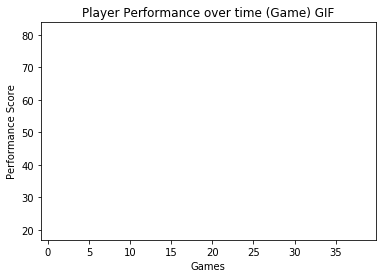

In [14]:
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
#Players 18-21 did not play any game
plt.xlabel('Games')
plt.ylabel('Performance Score')
plt.title('Player Performance over time (Game) GIF')
dfPer.set_index('GameID', inplace=True)
for i in range(17):
    t = plt.plot(dfPer[dfPer["PlayerID"] == i+1].PerformanceScore)
    plt.legend(t, [f'Player {i+1}'])
    camera.snap()
animation = camera.animate()
animation.save('Performance.gif', writer = 'imagemagick')
dfPer.reset_index(inplace=True)
dfPer.head()

In [15]:
dfPer["PerformanceScore"].max()

80.75302804382518

In [16]:
dfPer["PerformanceScore"].min()

17.016373365206878

In [17]:
dfPer.to_csv("PerformanceMeasure.csv", index = None, header=True)